# **2. DATA COLLECTION**

The data contains both phishing/malign URL and clean/benign URL.
The phishing URLs are crawled from phishtank.org while the clean data comes from commoncrawl.org.
The data is split into 2 set: Training set and Test set.
The Training set has 2 million URLs for each phishing and clean data. The Test set has 1 Million phish URLs and 1 million clean URLs.

In [13]:
# Importing pandas for data manipulation
import pandas as pd
# Importing numpy for numerical operations
import numpy as np
# Importing seaborn and matplotlib for visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Loading the data
# We then specify the column names using 'names=['url']'.
benign_test_file = pd.read_table('benign_Test.txt', header=None, names=['url'])
malign_test_file = pd.read_table('malign_Test.txt', header=None, names=['url'])
benign_train_file = pd.read_table('benign_Train.txt', header=None, names=['url'])
malign_train_file = pd.read_table('malign_Train.txt', header=None, names=['url'])

# Now you can access the 'url' column:
benign_test_file.head()
malign_test_file.head()
benign_train_file.head()
malign_train_file.head()

,url
0,bosquedarobina.blogspot.com.au
1,get.aknigi.club
2,amazon.com/experiment-adrien-brody/dp/b003vel9ei
3,sexymaryjane.blogspot.be
4,linkfreak.blogspot.de


In [ ]:
# Label the data (1 for phishing, 0 for clean)
benign_train_file["label"] = "benign_train" # Assign "benign_train" to the "label" column
malign_train_file["label"] = "malign_train" # Assign "malign_train" to the "label" column
benign_test_file["label"] = "benign_test"   # Assign "benign_test" to the "label" column
malign_test_file["label"] = "malign_test"   # Assign "malign_test" to the "label" column


benign_test_file.head()
malign_test_file.head()
benign_train_file.head()
malign_train_file.head()

,url,label
0,bosquedarobina.blogspot.com.au,malign_train
1,get.aknigi.club,malign_train
2,amazon.com/experiment-adrien-brody/dp/b003vel9ei,malign_train
3,sexymaryjane.blogspot.be,malign_train
4,linkfreak.blogspot.de,malign_train


In [4]:
# Convert to csv
benign_train_file.to_csv("benign_Train.txt", sep="\t", index=False, header=True)
malign_train_file.to_csv("malign_Train.txt", sep="\t", index=False, header=True) # Add to_csv
benign_test_file.to_csv("benign_Test.txt", sep="\t", index=False, header=True) # Add to_csv
malign_test_file.to_csv("malign_Test.txt", sep="\t", index=False, header=True) # Add to_csv

In [5]:
# Combine the training and test datasets
train_data = pd.concat([benign_train_file, malign_train_file], ignore_index=True)
test_data = pd.concat([benign_test_file, malign_test_file], ignore_index=True)

In [ ]:
combined_data = pd.concat([train_data, test_data], ignore_index=True)
combined_data.head()

,url,label
0,karens-krazy-korner.blogspot.com/2010/,benign_train
1,www.tmentertainment.com/ccount/click.php?id=173,benign_train
2,asian.videos.xblog.in/thai-wife-get-fuck-by-hu...,benign_train
3,kpn.se/resurser/bilder-att-farglagga,benign_train
4,www.indokitay.ru/landing/toniki-aasha-herbals/,benign_train


In [ ]:
combined_data.shape

(6568184, 2)

## **3. FEATURE EXTRACTION:**

In this step, features are extracted from the URLs dataset.

The extracted features are categorized into


1.   Address Bar based Features
2.   Domain based Features
3.   HTML & Javascript based Features
4.   Special Character based Features




**# 3.1 Address Bar based features**

In [ ]:
# importing required packages for this section
from urllib.parse import urlparse,urlencode
import ipaddress
import re

In [43]:
# 1.Domain of the URL (Domain)
def getDomain(url):
  domain = urlparse(url).netloc
  if re.match(r"^www.",domain):
	       domain = domain.replace("www.","")
  return domain

In [ ]:
# 2.Checks for IP address in URL (Have_IP)
def havingIP(url):
  try:
    ipaddress.ip_address(url)
    ip = 1
  except:
    ip = 0
  return ip


In [ ]:
# 3.Checks the presence of @ in URL (Have_At)
def haveAtSign(url):
  if "@" in url:
    at = 1
  else:
    at = 0
  return at

In [ ]:
# 4.Finding the length of URL and categorizing (URL_Length)
def getLength(url):
  if len(url) < 54:
    length = 0
  else:
    length = 1
  return length

In [ ]:
# 5.Gives number of '/' in URL (URL_Depth)
def getDepth(url):
  s = urlparse(url).path.split('/')
  depth = 0
  for j in range(len(s)):
    if len(s[j]) != 0:
      depth = depth+1
  return depth

In [ ]:
# 6.Checking for redirection '//' in the url (Redirection)
def redirection(url):
  pos = url.rfind('//')
  if pos > 6:
    if pos > 7:
      return 1
    else:
      return 0
  else:
    return 0

In [ ]:
# 7.Existence of “HTTPS” Token in the Domain Part of the URL (https_Domain)
def httpDomain(url):
  domain = urlparse(url).netloc
  if 'https' in domain:
    return 1
  else:
    return 0

In [ ]:
#listing shortening services
shortening_services = r"bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|" \
                      r"yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|" \
                      r"short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|" \
                      r"doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|db\.tt|" \
                      r"qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|q\.gs|is\.gd|" \
                      r"po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|x\.co|" \
                      r"prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|" \
                      r"tr\.im|link\.zip\.net"

In [ ]:
# 8. Checking for Shortening Services in URL (Tiny_URL)
def tinyURL(url):
    match=re.search(shortening_services,url)
    if match:
        return 1
    else:
        return 0

In [ ]:
# 9.Checking for Prefix or Suffix Separated by (-) in the Domain (Prefix/Suffix)
def prefixSuffix(url):
    if '-' in urlparse(url).netloc:
        return 1            # phishing
    else:
        return 0            # legitimate

 **3.2 Domain Based Features**

In [ ]:
!pip install python-whois

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.3/103.3 kB 9.1 MB/s eta 0:00:00


In [ ]:
# importing required packages for this section
import re
from bs4 import BeautifulSoup
import whois
import urllib
import urllib.request
from datetime import datetime

In [ ]:
# 11.DNS Record availability (DNS_Record)
# obtained in the featureExtraction function itself

In [ ]:
# 12.Web traffic (Web_Traffic)
def web_traffic(url):
  try:
    #Filling the whitespaces in the URL if any
    url = urllib.parse.quote(url)
    rank = BeautifulSoup(urllib.request.urlopen("http://data.alexa.com/data?cli=10&dat=s&url=" + url).read(), "xml").find(
        "REACH")['RANK']
    rank = int(rank)
  except TypeError:
        return 1
  if rank <100000:
    return 1
  else:
    return 0

    print(rank)

In [ ]:
# 13.Survival time of domain: The difference between termination time and creation time (Domain_Age)
def domainAge(domain_name):
  creation_date = domain_name.creation_date
  expiration_date = domain_name.expiration_date
  if (isinstance(creation_date,str) or isinstance(expiration_date,str)):
    try:
      creation_date = datetime.strptime(creation_date,'%Y-%m-%d')
      expiration_date = datetime.strptime(expiration_date,"%Y-%m-%d")
    except:
      return 1
  if ((expiration_date is None) or (creation_date is None)):
      return 1
  elif ((type(expiration_date) is list) or (type(creation_date) is list)):
      return 1
  else:
    ageofdomain = abs((expiration_date - creation_date).days)
    if ((ageofdomain/30) < 6):
      age = 1
    else:
      age = 0
  return age

  print(ageofdomain)

In [ ]:
# 14.End time of domain: The difference between termination time and current time (Domain_End)
def domainEnd(domain_name):
  expiration_date = domain_name.expiration_date
  if isinstance(expiration_date,str):
    try:
      expiration_date = datetime.strptime(expiration_date,"%Y-%m-%d")
    except:
      return 1
  if (expiration_date is None):
      return 1
  elif (type(expiration_date) is list):
      return 1
  else:
    today = datetime.now()
    end = abs((expiration_date - today).days)
    if ((end/30) < 6):
      end = 0
    else:
      end = 1
  return end

# **URL VISUALIZATION**

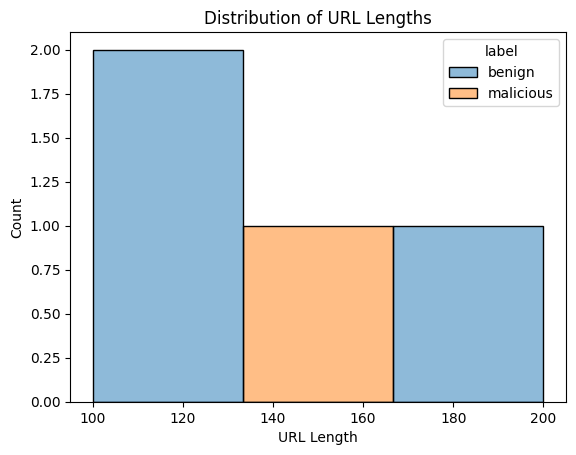

In [42]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' from your previous code (input-11) is your dataset
# and it has a 'url_length' column added. If not, you'll need to
# create/load your DataFrame and add the 'url_length' column first.

# Example: Adding a dummy url_length column to 'df' for demonstration
df['url_length'] = [100, 150, 200, 100]

# Add a dummy 'label' column for demonstration
df['label'] = ['benign', 'malicious', 'benign', 'benign']

# Now 'df' acts as your 'combined_data'
combined_data = df

# Create the histogram
sns.histplot(data=combined_data, x='url_length', hue='label')
plt.title('Distribution of URL Lengths')
plt.xlabel('URL Length')
plt.ylabel('Count')
plt.show()

# **4.Extract JS features**

In [39]:
import requests
from bs4 import BeautifulSoup
import re

def extract_js_features(url):
    try:
        # Fetch HTML content of the website
        response = requests.get(url)
        html_content = response.text

        # Parse HTML with BeautifulSoup
        soup = BeautifulSoup(html_content, 'html.parser')

        # Extract all <script> tags
        script_tags = soup.find_all('script')

        # Count number of script tags
        js_count = len(script_tags)

        # Check for inline JavaScript (JavaScript embedded within HTML)
        inline_scripts = [script for script in script_tags if not script.get('src')]
        inline_js = len(inline_scripts)

        # Extract potential JavaScript-related attributes (onload, onclick, etc.)
        js_events = re.findall(r'on\w+=["\'].*?["\']', html_content)
        js_event_count = len(js_events)

        # Examples of JS features
        inline_js_examples = [script.text[:100] + '...' if script.text else '(Empty Script)' for script in inline_scripts[:3]]
        js_event_examples = js_events[:5]

        return {
            "Total JavaScript Scripts": js_count,
            "Inline JavaScript Scripts": {
                "Count": inline_js,
                "Examples": inline_js_examples
            },
            "JavaScript Event Attributes": {
                "Count": js_event_count,
                "Examples": js_event_examples
            }
        }

    except Exception as e:
        return {"error": str(e)}

# Example usage:
url = 'http://example.com'
js_features = extract_js_features(url)

# Pretty-print the result
print("JavaScript Features Analysis:\n")
if "error" in js_features:
    print(f"Error: {js_features['error']}")
else:
    for feature, details in js_features.items():
        if isinstance(details, dict):
            print(f"{feature}:")
            print(f"  Count   : {details['Count']}")
            print(f"  Examples: {details['Examples']}\n")
        else:
            print(f"{feature}: {details}")


JavaScript Features Analysis:

Total JavaScript Scripts: 0
Inline JavaScript Scripts:
  Count   : 0
  Examples: []

JavaScript Event Attributes:
  Count   : 2
  Examples: ['ontent="text/html; charset=utf-8"', 'ontent="width=device-width, initial-scale=1"']



# **Visualization of JS features**

We use seaborn.histplot to create a histogram for the special character count.
hue='label' again separates the data by phishing and benign URLs.
bins=20 controls the number of bins for the histogram.

 These visualizations help TO understand the distribution of URL lengths and special character counts in the dataset and how they differ between phishing and benign URLs.

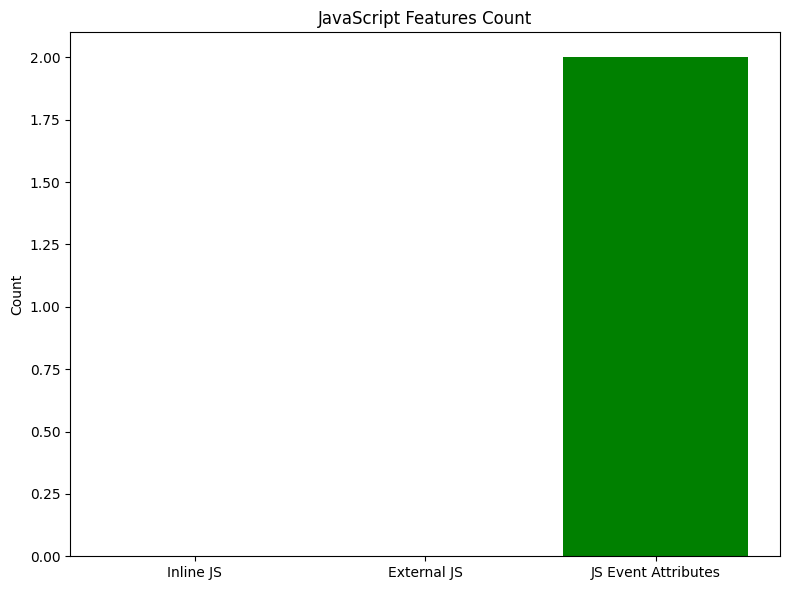

In [41]:
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import re

# Function to extract JavaScript features
def extract_js_features(url):
    try:
        response = requests.get(url)
        html_content = response.text
        soup = BeautifulSoup(html_content, 'html.parser')
        script_tags = soup.find_all('script')
        js_count = len(script_tags)
        inline_scripts = [script for script in script_tags if not script.get('src')]
        inline_js = len(inline_scripts)
        js_events = re.findall(r'on\w+=["\'].*?["\']', html_content)
        js_event_count = len(js_events)
        inline_js_examples = [script.text[:100] + '...' if script.text else '(Empty Script)' for script in inline_scripts[:3]]
        js_event_examples = js_events[:5]

        return {
            "Total JavaScript Scripts": js_count,
            "Inline JavaScript Scripts": {
                "Count": inline_js,
                "Examples": inline_js_examples
            },
            "JavaScript Event Attributes": {
                "Count": js_event_count,
                "Examples": js_event_examples
            }
        }

    except Exception as e:
        return {"error": str(e)}

# Visualization function
def visualize_js_features(js_features):
    if "error" in js_features:
        print(f"Error: {js_features['error']}")
        return

    # Extract data for visualization
    total_js = js_features["Total JavaScript Scripts"]
    inline_js_count = js_features["Inline JavaScript Scripts"]["Count"]
    js_event_count = js_features["JavaScript Event Attributes"]["Count"]
    external_js_count = total_js - inline_js_count  # External JS scripts

    # Data for graphs
    labels = ["Inline JS", "External JS", "JS Event Attributes"]
    values = [inline_js_count, external_js_count, js_event_count]

    # Bar Chart: Counts of JavaScript Features
    plt.figure(figsize=(8, 6))
    plt.bar(labels, values, color=['orange', 'blue', 'green'])
    plt.title("JavaScript Features Count")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()



# Example usage
url = 'http://example.com'
js_features = extract_js_features(url)
visualize_js_features(js_features)


Bar Chart: Highlight the dominance of inline, external, or event-related JavaScript on the webpage

# **5. Extract SpecialChar features**

In [38]:
import re
from urllib.parse import urlparse, unquote

def extract_special_characters_from_url(url):
    # Parse the URL
    parsed_url = urlparse(url)

    # Check for encoded characters (e.g., %20 for space)
    encoded_characters = re.findall(r'%[0-9A-Fa-f]{2}', url)

    # Check for special characters like &, ?, #, @, !, etc.
    special_characters = re.findall(r'[\&\?\#\!\@\$\%\*\+\=]', url)

    # Check for unusual domain names (e.g., punycode or suspicious subdomains)
    domain = parsed_url.netloc
    special_in_domain = re.findall(r'[^\x00-\x7F]', domain)  # Non-ASCII characters

    # Decode URL and check for hidden or special characters after decoding
    decoded_url = unquote(url)
    decoded_special_characters = re.findall(r'[^\x00-\x7F]', decoded_url)

    # Return results in a detailed, formatted dictionary
    return {
        "Encoded Characters": {
            "Count": len(encoded_characters),
            "Examples": encoded_characters[:5]
        },
        "Special Characters": {
            "Count": len(special_characters),
            "Examples": special_characters[:5]
        },
        "Special Characters in Domain": {
            "Count": len(special_in_domain),
            "Examples": special_in_domain[:5]
        },
        "Decoded Special Characters": {
            "Count": len(decoded_special_characters),
            "Examples": decoded_special_characters[:5]
        }
    }

# Example usage:
url = 'http://example.com/?search=%3Cscript%3Ealert%281%29%3C/script%3E'
special_features = extract_special_characters_from_url(url)

# Pretty-print the result
print("Detailed URL Analysis:\n")
for feature, details in special_features.items():
    print(f"{feature}:")
    print(f"  Count   : {details['Count']}")
    print(f"  Examples: {details['Examples']}")
    print()


Detailed URL Analysis:

Encoded Characters:
  Count   : 6
  Examples: ['%3C', '%3E', '%28', '%29', '%3C']

Special Characters:
  Count   : 8
  Examples: ['?', '=', '%', '%', '%']

Special Characters in Domain:
  Count   : 0
  Examples: []

Decoded Special Characters:
  Count   : 0
  Examples: []



# **VISUALIZATION OF SPECIAL CHARACTER FEATURES**

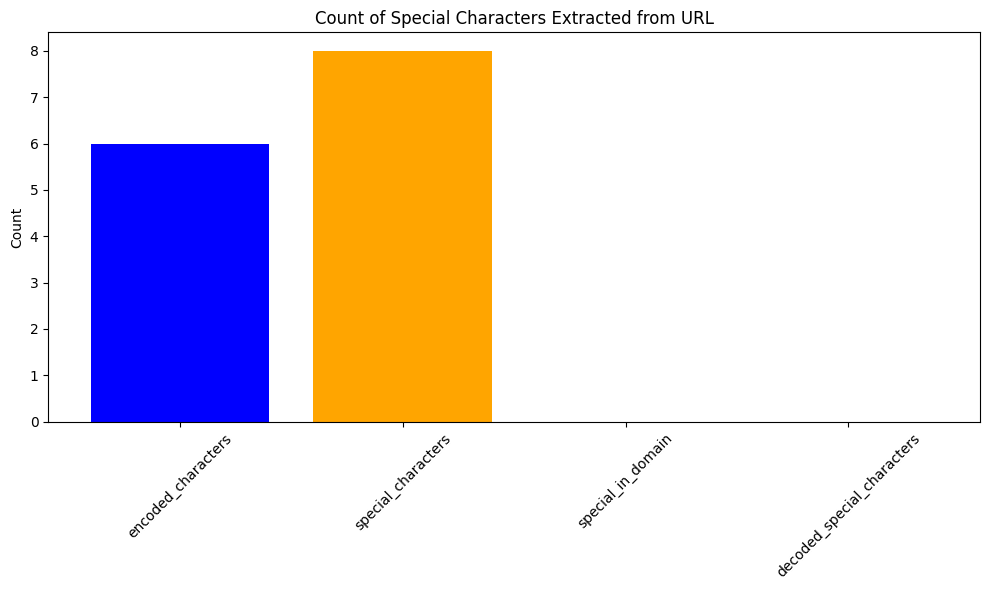

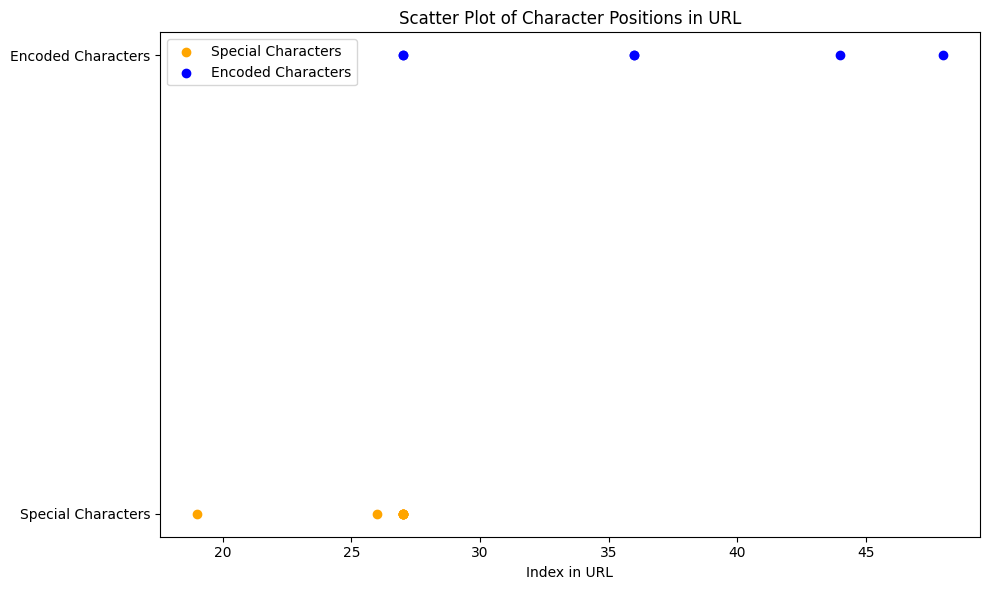

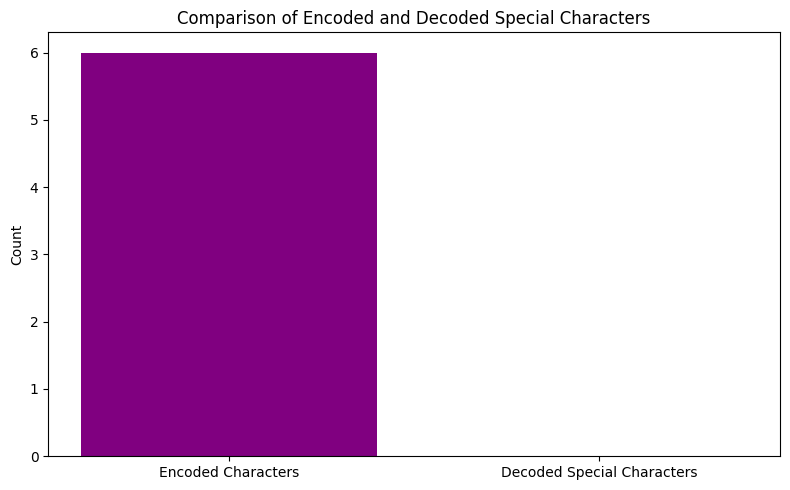

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Function to generate visualizations
def visualize_special_characters(special_features, url):
    categories = list(special_features.keys())
    counts = [len(special_features[key]) for key in categories]

    # Histogram: Distribution of counts
    plt.figure(figsize=(10, 6))
    plt.bar(categories, counts, color=['blue', 'orange', 'green', 'red'])
    plt.title('Count of Special Characters Extracted from URL')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Scatter Plot: Visualizing indices of encoded and special characters
    special_characters = special_features["special_characters"]
    encoded_characters = special_features["encoded_characters"]

    special_indices = [url.find(char) for char in special_characters]
    encoded_indices = [url.find(char) for char in encoded_characters]

    plt.figure(figsize=(10, 6))
    plt.scatter(special_indices, [1] * len(special_indices), label='Special Characters', color='orange')
    plt.scatter(encoded_indices, [2] * len(encoded_indices), label='Encoded Characters', color='blue')
    plt.title('Scatter Plot of Character Positions in URL')
    plt.xlabel('Index in URL')
    plt.yticks([1, 2], ['Special Characters', 'Encoded Characters'])
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Bar Chart: Comparison of decoded vs encoded characters
    decoded_special = len(special_features["decoded_special_characters"])
    encoded_special = len(encoded_characters)

    labels = ['Encoded Characters', 'Decoded Special Characters']
    values = [encoded_special, decoded_special]

    plt.figure(figsize=(8, 5))
    plt.bar(labels, values, color=['purple', 'teal'])
    plt.title('Comparison of Encoded and Decoded Special Characters')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

# Example usage
url = 'http://example.com/?search=%3Cscript%3Ealert%281%29%3C/script%3E'
special_features = extract_special_characters_from_url(url)
visualize_special_characters(special_features, url)


# INTERPRETATION OF THE SPECIAL CHARACTER VISUALIZATION

*Bar Chart:*
Represents the count of each type of special character extracted from the URL.
*Scatter Plot:*
Displays where in the URL the special_characters and encoded_characters appear.
*Comparison Chart:*
Highlights the number of encoded vs decoded special characters.